In [ ]:
%matplotlib widget 

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the displacement data
displacement_data = np.load('displacement.npy')

# Check the shape of the loaded data to ensure it's correct
print("Shape of the displacement data:", displacement_data.shape)

# Extract X, Y, Z displacements
X_displacement = displacement_data[:, 0]
Y_displacement = displacement_data[:, 1]
Z_displacement = displacement_data[:, 2]

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_displacement, Y_displacement, Z_displacement, c='b', marker='o')

ax.set_title('3D Displacement Scatter Plot')
ax.set_xlabel('X Displacement')
ax.set_ylabel('Y Displacement')
ax.set_zlabel('Z Displacement')

plt.show()

# Create 2D histograms to analyze distribution of displacements in pairs of dimensions
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# X vs Y displacement
axs[0].hist2d(X_displacement, Y_displacement, bins=50, cmap='Blues')
axs[0].set_title('X vs Y Displacement')
axs[0].set_xlabel('X Displacement')
axs[0].set_ylabel('Y Displacement')

# X vs Z displacement
axs[1].hist2d(X_displacement, Z_displacement, bins=50, cmap='Greens')
axs[1].set_title('X vs Z Displacement')
axs[1].set_xlabel('X Displacement')
axs[1].set_ylabel('Z Displacement')

# Y vs Z displacement
axs[2].hist2d(Y_displacement, Z_displacement, bins=50, cmap='Reds')
axs[2].set_title('Y vs Z Displacement')
axs[2].set_xlabel('Y Displacement')
axs[2].set_ylabel('Z Displacement')

plt.show()


X Displacement Statistics:
Mean: -0.05715855
Standard Deviation: 0.017204307
Min: -0.15791926
Max: 0.009530716

Y Displacement Statistics:
Mean: 0.04248675
Standard Deviation: 0.016525252
Min: -0.0006329324
Max: 0.12058952

Z Displacement Statistics:
Mean: 0.14198397
Standard Deviation: 0.033651672
Min: 0.06211534
Max: 0.31096026


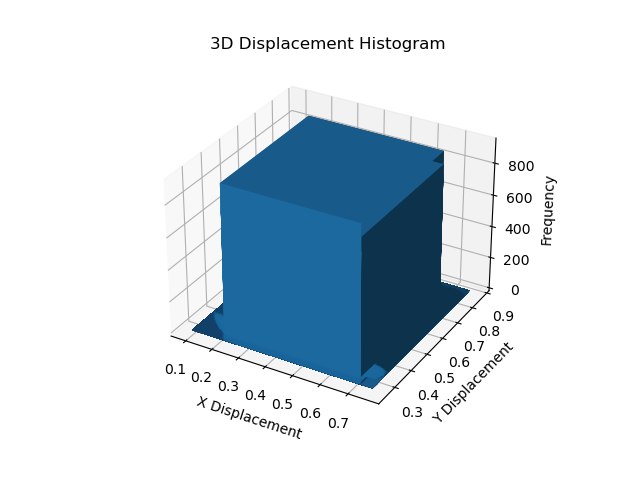

In [3]:
# get some general statistics
print("X Displacement Statistics:")
print("Mean:", np.mean(X_displacement))
print("Standard Deviation:", np.std(X_displacement))
print("Min:", np.min(X_displacement))
print("Max:", np.max(X_displacement))

print("\nY Displacement Statistics:")
print("Mean:", np.mean(Y_displacement))
print("Standard Deviation:", np.std(Y_displacement))
print("Min:", np.min(Y_displacement))
print("Max:", np.max(Y_displacement))

print("\nZ Displacement Statistics:")
print("Mean:", np.mean(Z_displacement))
print("Standard Deviation:", np.std(Z_displacement))
print("Min:", np.min(Z_displacement))
print("Max:", np.max(Z_displacement))

# Create a 3D histogram
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(X_displacement, Y_displacement, bins=500)

# Construct arrays for the anchor positions of the bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()

# Construct arrays with the dimensions for the bars.
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

# Create 3D bars
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

ax.set_title('3D Displacement Histogram')
ax.set_xlabel('X Displacement')
ax.set_ylabel('Y Displacement')
ax.set_zlabel('Frequency')

plt.show()




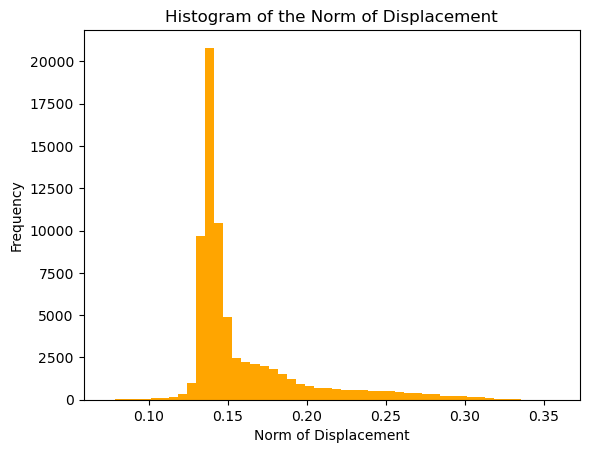

In [4]:
norm_displacement = np.sqrt(X_displacement**2 + Y_displacement**2 + Z_displacement**2)

#get histogram of the norm of the displacement
fig, ax = plt.subplots()
ax.hist(norm_displacement, bins=50, color='orange')
ax.set_title('Histogram of the Norm of Displacement')
ax.set_xlabel('Norm of Displacement')
ax.set_ylabel('Frequency')
plt.show()
